<a href="https://colab.research.google.com/github/nelslindahlx/KnowledgeReduce/blob/main/CivicHonorsKGv6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Summary

The revised code provides a robust and modular solution for continuously building and analyzing a knowledge graph from web-scraped data. Here’s a summary of each part of the code:

1. **Install Necessary Libraries**:
   - Installs critical Python packages for HTTP requests (`requests`), HTML parsing (`beautifulsoup4`), graph operations (`networkx`), efficient HTML parsing (`lxml`), graph visualization (`matplotlib`), and community detection in graphs (`python-louvain`).

2. **Import Libraries**:
   - Consolidates all necessary library imports at the beginning, preparing the environment for web scraping, graph processing, and analysis.

3. **Fact Extraction Function (`extract_facts`)**:
   - Defines a function to extract facts from a given URL. It uses BeautifulSoup for HTML parsing and employs both targeted and broad extraction methods to gather data. The function is designed to be adaptable to various web page structures, ensuring a comprehensive extraction process.

4. **Graph Update and Save Function (`update_graph`)**:
   - Introduces a function to update the knowledge graph with new facts. It either loads an existing graph or creates a new one, then adds unique facts as nodes. The graph is saved in the GEXF format for persistence and future analysis.

5. **Advanced Visualization and Analysis**:
   - Implements functions for visualizing a portion of the graph and for community detection:
     - `visualize_graph`: Visualizes a subset of the graph nodes using a spring layout, providing an initial view of the graph's structure.
     - `detect_communities`: Performs community detection using the Louvain method, helping to identify clusters or groups within the graph. This function enhances the understanding of the graph’s structure and the relationships between its nodes.

This code effectively sets the stage for building a continuously growing knowledge graph by regularly extracting new information from web pages and updating the graph structure accordingly. The modular design allows for easy expansion and customization based on specific project requirements. While this script covers key aspects of data extraction, graph updating, and basic analysis, further enhancements could include automation for regular updates, integration with a database for handling larger datasets, and the use of more sophisticated visualization tools for large-scale graphs.

# Step 1: Install Necessary Libraries

In [1]:
!pip install requests beautifulsoup4 networkx lxml matplotlib python-louvain

# Step 2: Import Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt
import re
import os
from community import community_louvain

# Step 3: Define Fact Extraction Function

In [3]:
def extract_facts(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'lxml')
        facts = []

        # Extract facts using both targeted and broad extraction methods
        target_selectors = ['.fact-content', '#main-facts', 'div.info-box']
        for selector in target_selectors:
            for element in soup.select(selector):
                text = ' '.join(element.stripped_strings)
                if text:
                    facts.append(text)

        for tag in soup.find_all(['p', 'article', 'section', 'div']):
            if re.search(r'^(Fact:|Info:|Note:)', tag.text) or re.search(r'\d{4}', tag.text):
                text = ' '.join(tag.stripped_strings)
                if text:
                    facts.append(text)

        return facts
    except requests.exceptions.RequestException as e:
        print(f"Error during requests to {url} : {e}")
        return []

# Step 4: Update and Save Knowledge Graph

In [4]:
def update_graph(facts, graph_file='knowledge_graph.gexf'):
    # Load or initialize graph
    G = nx.read_gexf(graph_file) if os.path.exists(graph_file) else nx.DiGraph()

    # Add unique facts as nodes
    for fact in set(facts):
        if fact not in G:
            G.add_node(fact, label=fact)

    nx.write_gexf(G, graph_file)
    return G

# Example usage
url = "https://www.civichonors.com"
facts = extract_facts(url)
G = update_graph(facts)


# Step 5: Advanced Visualization and Analysis

Try 1: This is not very usable as a visualization its crowded and just bad

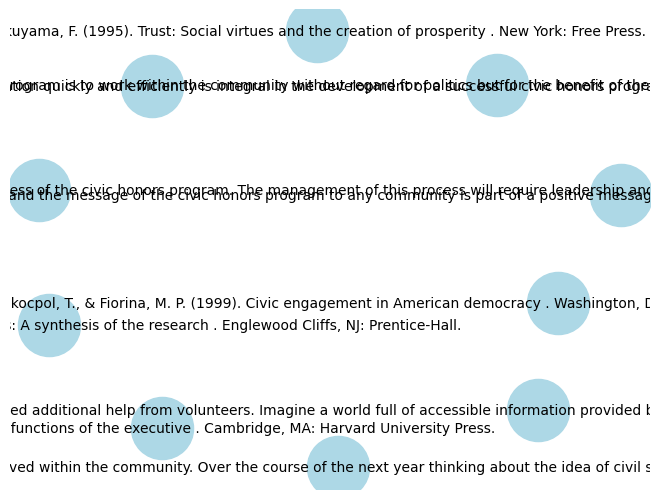

Number of communities detected: 73


In [5]:
# Visualize a portion of the graph
def visualize_graph(graph, limit=10):
    subgraph_nodes = list(graph.nodes())[:limit]
    subgraph = nx.subgraph(graph, subgraph_nodes)
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
    plt.show()

visualize_graph(G)

# Community detection
def detect_communities(graph):
    try:
        partition = community_louvain.best_partition(graph.to_undirected())
        num_communities = len(set(partition.values()))
        print("Number of communities detected:", num_communities)
    except AttributeError as e:
        print("Error in community detection:", e)

detect_communities(G)

Try 2: This just got bigger and not better... still bad

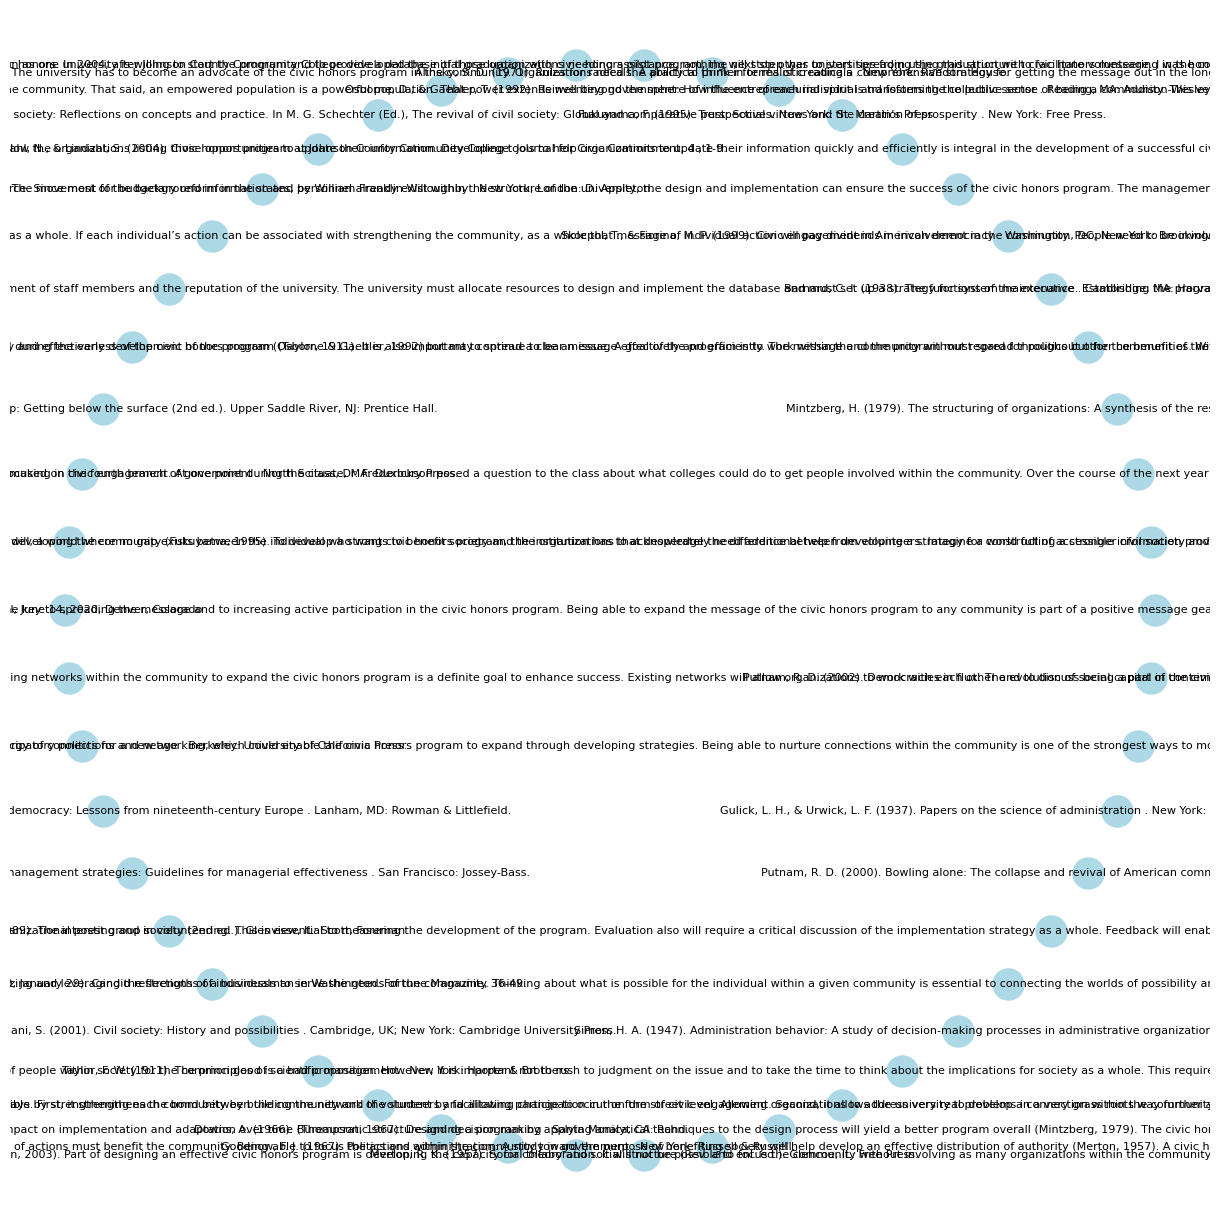

In [6]:
def visualize_graph(graph, limit=50):
    # Limit the number of nodes to display
    subgraph_nodes = list(graph.nodes())[:limit]
    subgraph = nx.subgraph(graph, subgraph_nodes)

    # Use Kamada-Kawai layout for better visualization of larger graphs
    pos = nx.kamada_kawai_layout(subgraph)

    # Draw the graph
    plt.figure(figsize=(12, 12))  # Increase figure size for better readability
    nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8)
    plt.show()

# Call the function to visualize the graph
visualize_graph(G)


Try 3: This just keeps getting worse...

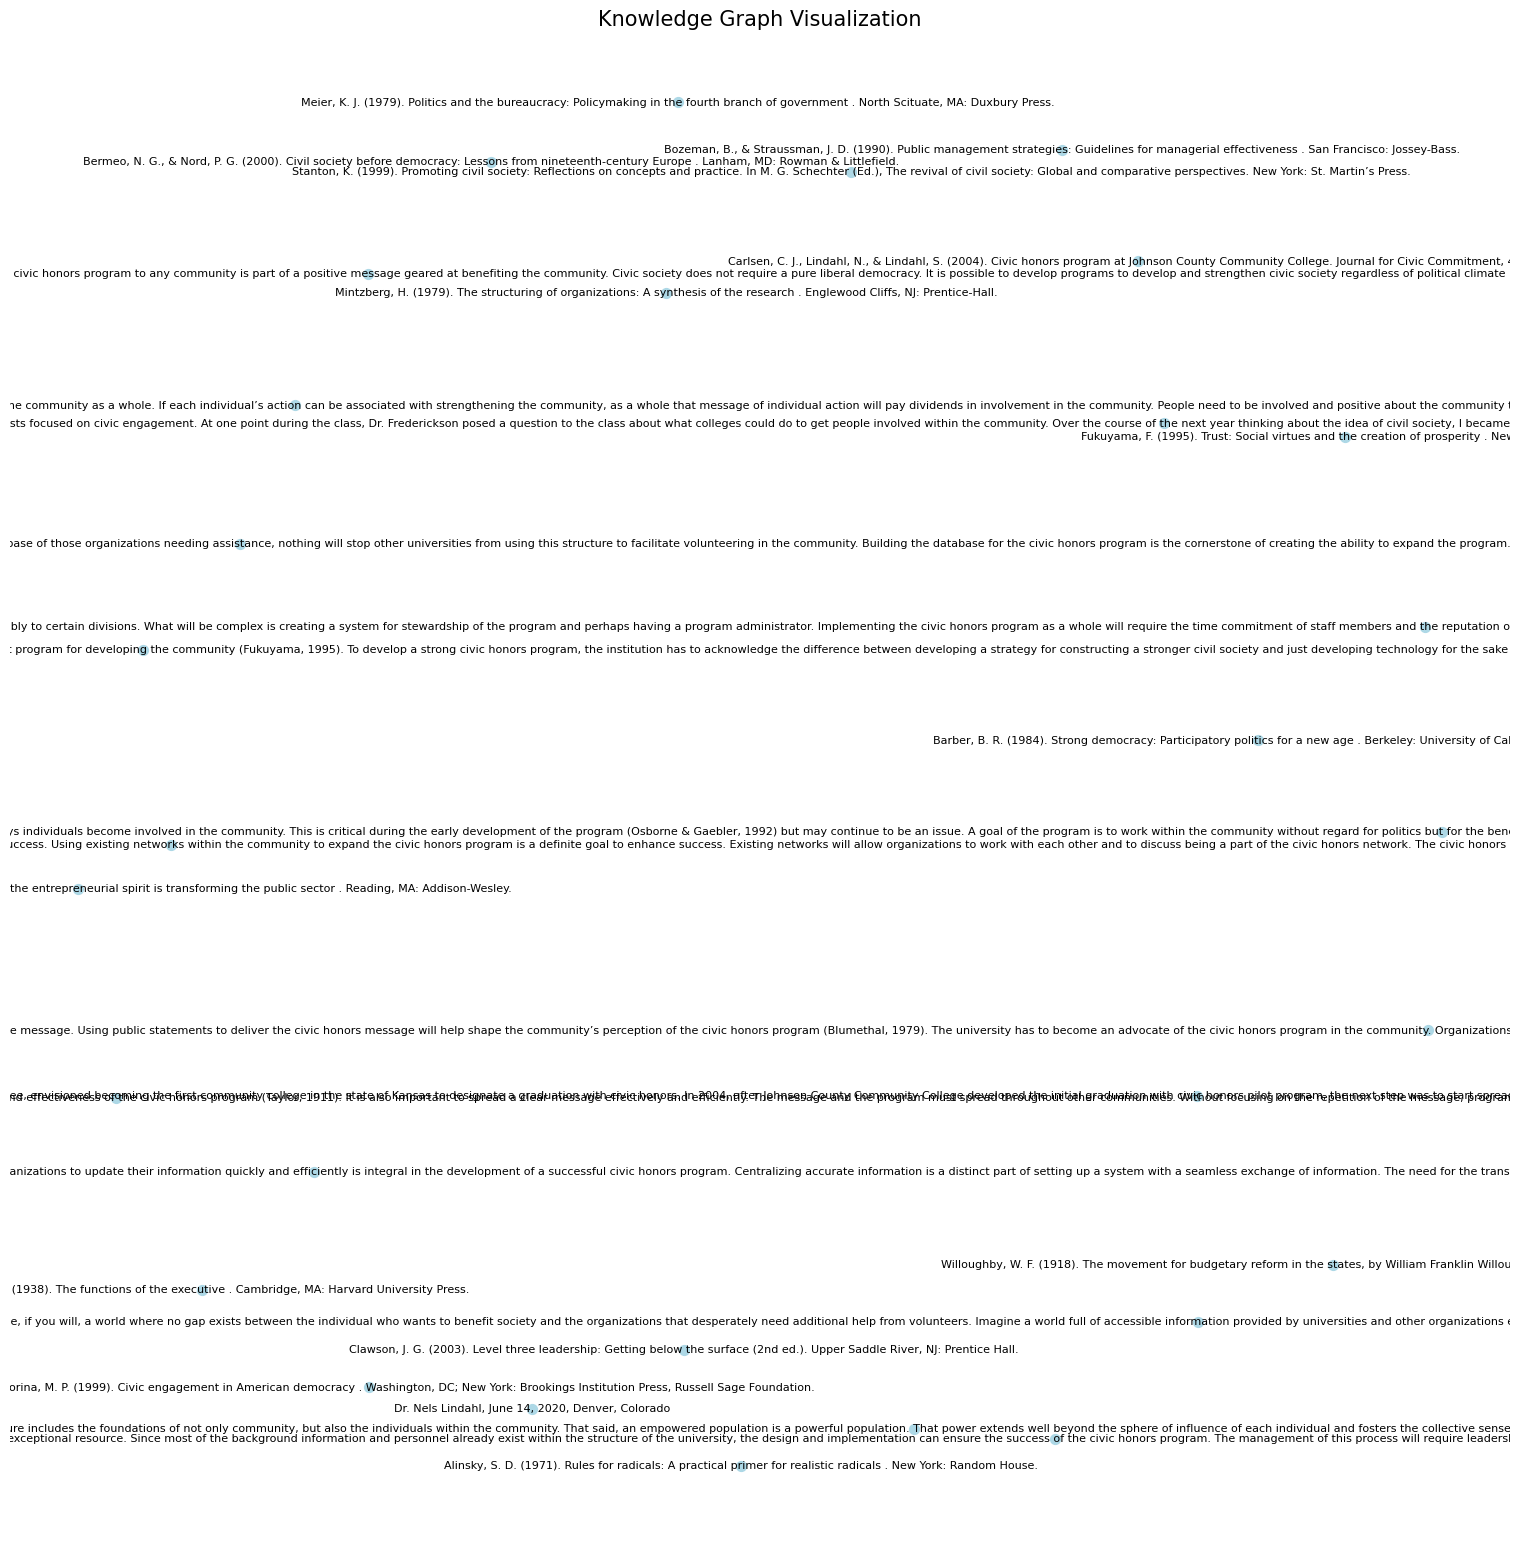

In [7]:
def visualize_graph(graph, limit=30, node_size=50, font_size=8):
    # Limit the number of nodes to display
    subgraph_nodes = list(graph.nodes())[:limit]
    subgraph = nx.subgraph(graph, subgraph_nodes)

    # Use Spring layout for better distribution of nodes
    pos = nx.spring_layout(subgraph, k=0.5, iterations=20)

    # Draw the graph with adjusted node size and font size
    plt.figure(figsize=(15, 15))  # Increase figure size
    nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=node_size, font_size=font_size)
    plt.title("Knowledge Graph Visualization", fontsize=15)
    plt.show()

# Call the function to visualize the graph
visualize_graph(G)

Try 4: This is better, but still not very good

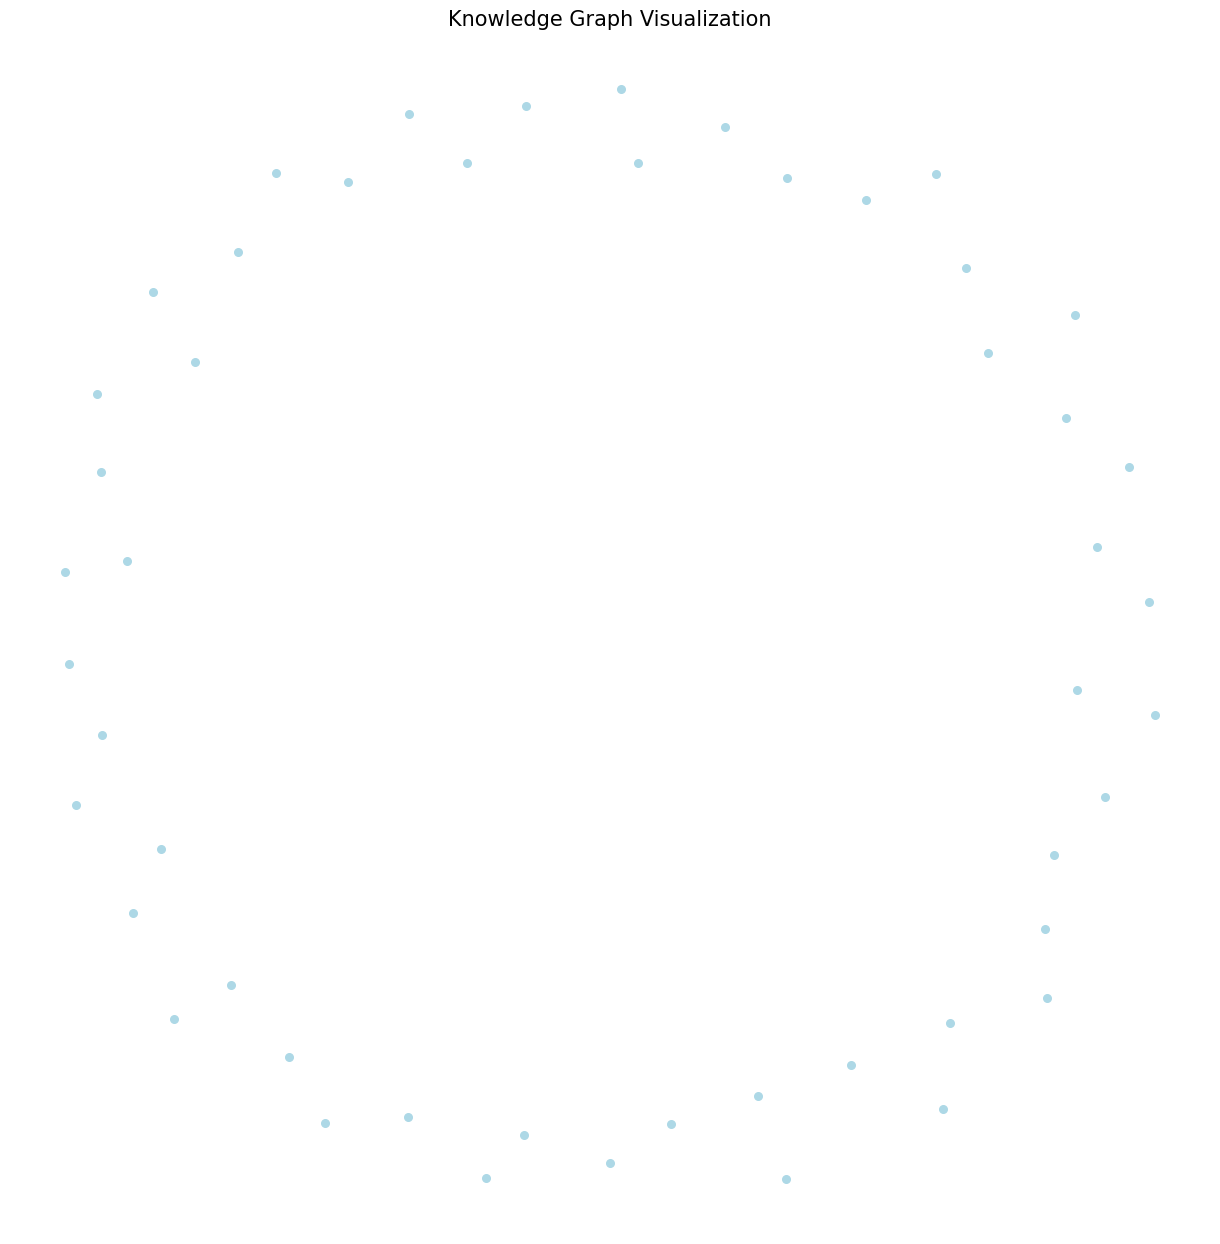

In [9]:
def visualize_graph(graph, limit=50, node_size=30):
    # Limit the number of nodes to display
    subgraph_nodes = list(graph.nodes())[:limit]
    subgraph = nx.subgraph(graph, subgraph_nodes)

    # Use Spring layout
    pos = nx.spring_layout(subgraph)

    # Draw the graph without labels for better clarity
    plt.figure(figsize=(12, 12))
    nx.draw(subgraph, pos, node_color='lightblue', node_size=node_size)
    plt.title("Knowledge Graph Visualization", fontsize=15)
    plt.show()

# Call the function to visualize the graph
visualize_graph(G)

Try 5:

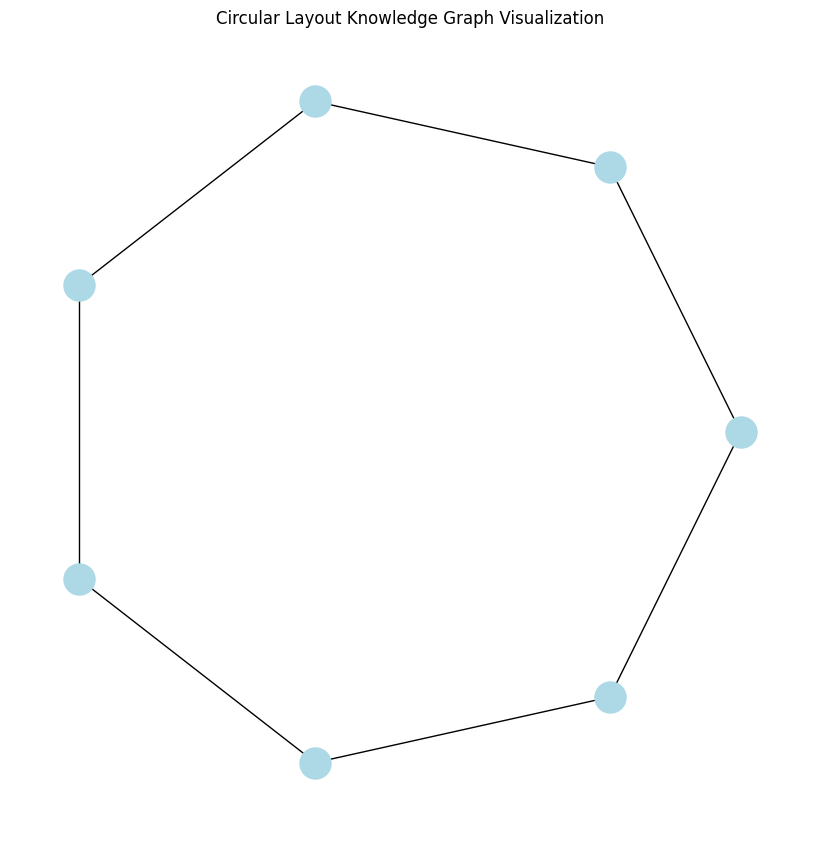

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G is the existing graph object
# For demonstration, let's create a small sample graph. In practice, this should be your actual graph data.
G = nx.Graph()
G.add_edge("Fact 1", "Fact 2")
G.add_edge("Fact 2", "Fact 3")
G.add_edge("Fact 3", "Fact 4")
G.add_edge("Fact 4", "Fact 5")
G.add_edge("Fact 5", "Fact 6")
G.add_edge("Fact 6", "Fact 1")

# Use Circular layout for the graph
pos = nx.circular_layout(G)

# Draw the graph without node labels for clarity
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_color='lightblue', with_labels=False, node_size=500)
plt.title("Circular Layout Knowledge Graph Visualization")
plt.show()